<a href="https://colab.research.google.com/github/bttrung/python-study-notebooks/blob/master/matplotlib/2_Absolute_and_Relative_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [0]:
%matplotlib inline

In [4]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.shape

(807, 14)

In [6]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [9]:
pkm_types = pokemon.melt(id_vars =['id', 'species'], value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level', value_name = 'type').dropna()
pkm_types[801:812]

,id,species,type_level,type
801,802,marshadow,type_1,fighting
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying


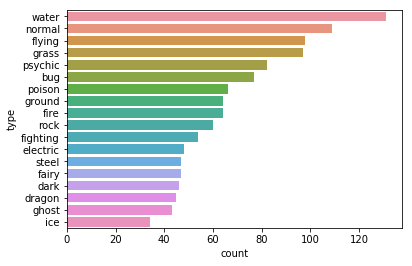

In [10]:
type_counts = pkm_types['type'].value_counts()
type_order = type_counts.index
sb.countplot(data=pkm_types, y = 'type', order = type_order)

In [11]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1623296158612144

In [14]:
tick_probs = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_probs]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

([<matplotlib.axis.XTick at 0x7faf5e5380f0>,
 <a list of 9 Text xticklabel objects>)

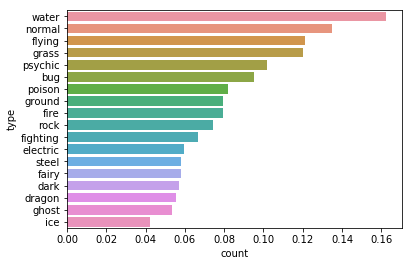

In [16]:
sb.countplot(data=pkm_types, y = 'type', order = type_order)
plt.xticks(tick_probs * n_pokemon, tick_names)
plt.xlabel('proportion')

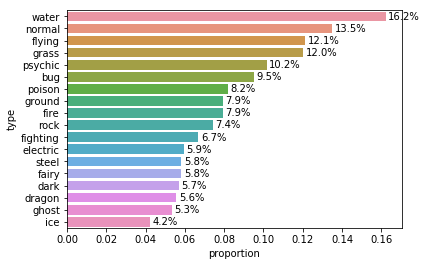

In [21]:
sb.countplot(data=pkm_types, y = 'type', order = type_order)
plt.xticks(tick_probs * n_pokemon, tick_names)
plt.xlabel('proportion')

for i in range(type_counts.shape[0]):
  count = type_counts[i]
  pct_str = '{:0.1f}%'.format(100*count/n_pokemon)
  plt.text(count+1, i, pct_str, va='center')
